# Test 12: t-test of a correlation coefficient

## Objective

- To investigate whether the difference between the sample correlation coefficient and zero is statistically significant

- What is the difference between this correlation coefficient test, and the regression coefficient test?
    - Correlation coefficients must be between -1 and 1, and so the range of values they can take is constrained
    - Regression coefficients have no theoretical bounds
    - As such, the test statistic for these is not the same

## Assumptions

- $x$ and $y$ originate from a bivariate normal distribution 
- Relationship between $x$ and $y$ is linear 
- This test only tests if the population coefficient is zero. 
    - To test an assumed value of the population coefficient other than zero, refer to the `Test 13: Z-test for a correlation coefficient`

## Method

- Given $n$ observations of $(x_i, y_i)$, the correlation coefficient $r$ is computed by
$$
    r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{[\sum(x_i - \bar{x})^2 \sum(y_i - \bar{y})^2]}}
$$

- The test statistic of this null hypothesis is 
$$
    t = r \cdot \sqrt{\frac{n-2}{1 - r^2}}
$$

- This test statistic follows a Student's t-distribution with $n-2$ degrees of freedom

## Example

- Problem
    - We want to study the relationship between TV advertising and product preferences 
    - We choose a panel of $n=18$ viewers 
    - Each panel members is asked to give a score from 1 to 20 the supermarket's house brand and a popular brand
    - The correlation coefficient between scores was 0.32

- Question   
    - Is this correlation significantly greater than zero?

In [2]:
n = 18
r = 0.32
degrees_of_freedom = n-2

t = (r * (n-2)**0.5) / ((1-r**2)**0.5)

## Proof by simulation that test statistic follows a t-distribution

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
n = 123
MU1 = 5
MU2 = 3
SIGMA1 = 7
SIGMA2 = 9

def get_test_statistic():
    xi = np.random.normal(MU1, SIGMA1, n)
    yi = np.random.normal(MU2, SIGMA2, n)

    numerator = np.sum((xi - np.mean(xi)) * (yi - np.mean(yi)))
    denominator1 = np.sum((xi - np.mean(xi))**2)
    denominator2 = np.sum((yi - np.mean(yi))**2)

    correlation_coefficient = numerator / (denominator1 * denominator2)**0.5

    t_stat = (correlation_coefficient / (1 - correlation_coefficient**2)**0.5) * (n - 2)**0.5
    return t_stat


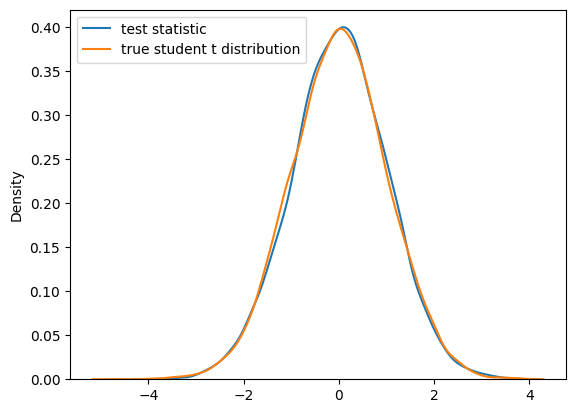

In [14]:
test_statistic_distribution = np.array([get_test_statistic() for _ in range(10_000)])
true_t_distribution = np.random.standard_t(df=n-2, size=10_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_t_distribution, label='true student t distribution')
plt.legend()